### Vecklande neurala nätverk (Convolutional Neural Networks)
Synnerver är ett av de mest välbeskrivna områdena inom neurologi. Istället för att processa hela bilder verkar varje nervtråd på ett litet område i synfältet. I artificiella neurala nätverk låter vi en <em>kärna</em> (en. <em>kernel</em>), till exempel ett 4x4 pixel område, vandra över bilden och köra en <em>konvolution</em>, dvs en matrisalgoritm, för att generera utdatan till nästa lager. Detta härmar synnerver, men är grundläggande annorlunda eftersom det inte sker helt parallellt. Hur långt (hur många pixlar) kerneln flyttar sig i varje steg kallas <em>stride</em>.

Mellan varje konvulotion finns normalt ett <em>pooling layer</em>, som i stort sett bara justerar bildmarginalerna och skickar vidare till nästa lager. 

Idéen är att varje lager minskar upplösningen och mängden detaljer i bilden och därmed lär sig känna igen mer och mer abstrakta detaljer. 

Ett annat sätt att se på kerneln är att kalla det ett <em>filter</em>, vilket också är vanligt i litteraturen och ännu vanligare i grafikprogram, som till exempel Photoshop.

Varje vecklande lager innehåller normalt flera kernels / filter, och utdatan är en featuremap per kernel. Alltså blir nätverken snabbt i många dimensioner; med 10 kernels blir en 2D färgbildbild alltså 50 dimensioner i nästa lager. I många CNNer används pooling lager för att kollapsa dessa till en ny 2D bild, till exempel genom att helt enkelt ta max av pixelvärdet över alla filter. 

<img src="../data/Gambar-51-Arsitektur-Jaringan-Gambar-51-merupakan-arsitektur-jaringan-pada-proses.jpg" />

Efter de vecklande lagrena så kommer ett klassificeringsnätverk. Hela konvolutionen är alltså en sorts databehandling som bygger upp en abstrakt featuremängd, som nätverket själv lär sig!

Varje pixel har alltså principiellt en nod med motsvarande vikt kopplat (dvs pixel värdet), även om vi beräknar utdatan till nästa lager genom att låta kerneln vandra över bilden. 

### CNN med pytorch

In [2]:
#setup
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

device = "cuda"

In [3]:
import numpy as np
import torch
from sklearn.datasets import load_sample_images
sample_images = np.stack(load_sample_images()["images"])
sample_images = torch.tensor(sample_images, dtype=torch.float32) / 255

In [4]:
sample_images.shape

torch.Size([2, 427, 640, 3])

In [5]:
sample_images_permuted = sample_images.permute(0, 3, 1, 2)
sample_images_permuted.shape

torch.Size([2, 3, 427, 640])

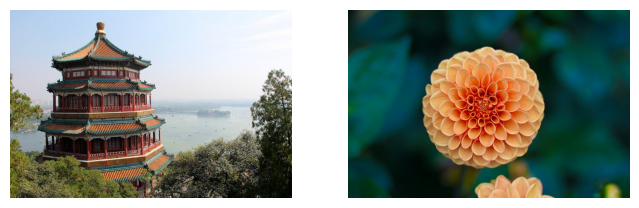

In [32]:
def plot_image(image):
    plt.imshow(image.permute(1, 2, 0))
    plt.axis("off")

plt.figure(figsize=(8, 4))
for index, image in enumerate(sample_images_permuted):    
    plt.subplot(1, 2, index + 1)
    plot_image(image)


In [7]:
import torchvision
import torchvision.transforms.v2 as T
cropped_images = T.CenterCrop((70, 120))(sample_images_permuted)
cropped_images.shape

torch.Size([2, 3, 70, 120])

torch.Size([3, 70, 120])
torch.Size([3, 70, 120])


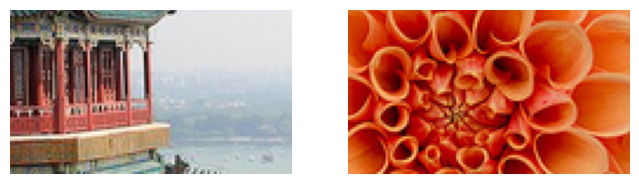

In [8]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(cropped_images[0])
plt.subplot(1, 2, 2)
plot_image(cropped_images[1])

In [9]:
import torch.nn as nn
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=7)
fmaps = conv_layer(cropped_images)

In [10]:
fmaps.shape

torch.Size([2, 32, 64, 114])

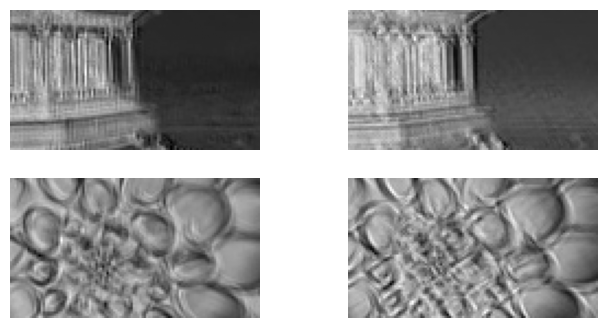

In [11]:
plt.figure(figsize=(8, 4))
for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, fmap_idx].detach(), cmap="gray")
        plt.axis("off")

plt.show()


In [12]:
conv_layer = nn.Conv2d(in_channels=3, out_channels=32,kernel_size=7,padding="same")
fmaps = conv_layer(cropped_images)
fmaps.shape

torch.Size([2, 32, 70, 120])

<img src="../Data/conv.jpg" width="480" />

In [13]:
conv_layer = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=7, stride=2,
                       padding=3)
fmaps = conv_layer(cropped_images)
fmaps.shape

torch.Size([2, 32, 35, 60])

In [14]:
conv_layer.weight.shape

torch.Size([32, 3, 7, 7])

In [15]:
conv_layer.bias.shape

torch.Size([32])

In [16]:
import torch.nn.functional as F

torch.manual_seed(42)
filters = torch.randn([2, 3, 7, 7])
biases = torch.zeros([2])
fmaps = F.conv2d(cropped_images, filters, biases, stride=1, padding="same")

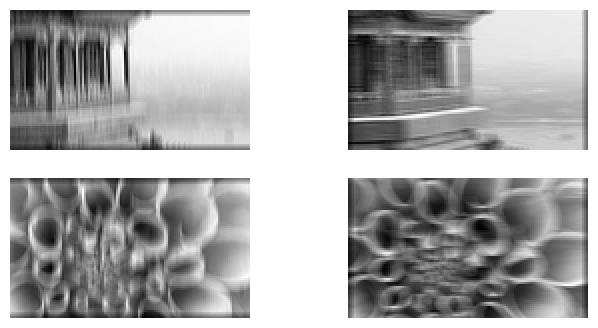

In [17]:
plt.figure(figsize=(8, 4))
filters = torch.zeros([2, 3, 7, 7])
filters[0, :, :, 3] = 1
filters[1, :, 3, :] = 1
fmaps = F.conv2d(cropped_images, filters, biases, stride=1, padding="same")

for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, fmap_idx], cmap="gray")
        plt.axis("off")

plt.show()



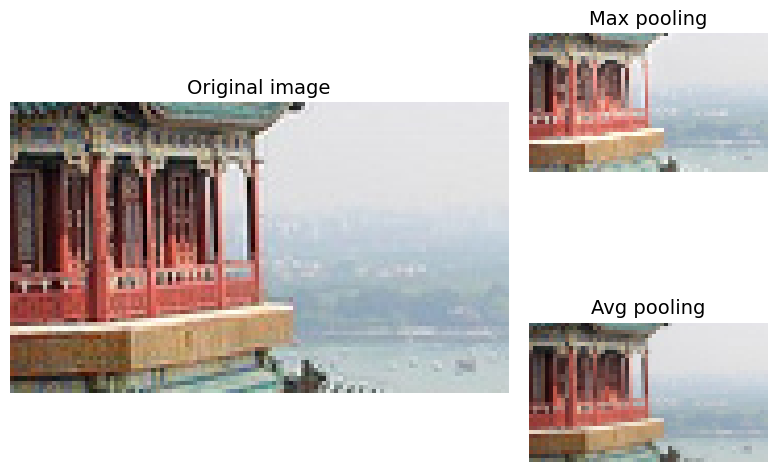

In [18]:
max_pool = nn.MaxPool2d(kernel_size=2)

output_max = max_pool(cropped_images)

avg_pool = nn.AvgPool2d(kernel_size=2)

output_avg = avg_pool(cropped_images)

# extra code – this cells shows what max pooling with stride = 2 looks like

fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot2grid((2, 3), (0, 0), rowspan=2, colspan=2)
ax1.imshow(cropped_images[0].permute(1, 2, 0))
ax1.axis('off')
ax1.set_title("Original image")

ax2 = plt.subplot2grid((2, 3), (0, 2))
ax2.imshow(output_max[0].permute(1, 2, 0))
ax2.axis('off')
ax2.set_title("Max pooling")

ax3 = plt.subplot2grid((2, 3), (1, 2))
ax3.imshow(output_avg[0].permute(1, 2, 0))
ax3.axis('off')
ax3.set_title("Avg pooling")

plt.tight_layout()
plt.show()



In [19]:
# Depth-wise pooling
import torch.nn.functional as F

class DepthMaxPool2(torch.nn.Module):
    def __init__(self, kernel_size, stride=None, padding=0):
        super().__init__()
        self.kernel_size = kernel_size
        self.stride = stride if stride is not None else kernel_size
        self.padding = padding

    def forward(self, inputs):
        batch, channels, height, width = inputs.shape
        Z = inputs.view(batch, channels, height * width)  # merge spatial dims
        Z = Z.permute(0, 2, 1)  # switch spatial and channels dims
        Z = F.max_pool1d(Z, kernel_size=self.kernel_size, stride=self.stride,
                         padding=self.padding)  # compute max pool
        Z = Z.permute(0, 2, 1)  # switch back spatial and channels dims
        return Z.view(batch, -1, height, width)  # unmerge spatial dims



In [20]:
global_avg_pool = nn.AdaptiveAvgPool2d(output_size=1)
output = global_avg_pool(cropped_images)



### Fasion-MNIST igen

In [21]:
from functools import partial

torch.manual_seed(42)  # extra code – ensure reproducibility
DefaultConv2d = partial(nn.Conv2d, kernel_size=3, padding="same")
model = nn.Sequential(
    DefaultConv2d(in_channels=1, out_channels=64, kernel_size=7), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    DefaultConv2d(in_channels=64, out_channels=128), nn.ReLU(),
    DefaultConv2d(in_channels=128, out_channels=128), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    DefaultConv2d(in_channels=128, out_channels=256), nn.ReLU(),
    DefaultConv2d(in_channels=256, out_channels=256), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(in_features=2304, out_features=128), nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(in_features=128, out_features=64), nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(in_features=64, out_features=10),
).to(device)



In [22]:


import torchmetrics

def evaluate_tm(model, data_loader, metric):
    model.eval()
    metric.reset()
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric.update(y_pred, y_batch)
    return metric.compute()

def train(model, optimizer, loss_fn, metric, train_loader, valid_loader,
          n_epochs):    
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.0
        metric.reset()
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        history["train_losses"].append(total_loss / len(train_loader))
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_tm(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    model.eval()
    return history



In [23]:


import torchvision
import torchvision.transforms.v2 as T

toTensor = T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)])

train_and_valid_data = torchvision.datasets.FashionMNIST(
    root="datasets", train=True, download=True, transform=toTensor)
test_data = torchvision.datasets.FashionMNIST(
    root="datasets", train=False, download=True, transform=toTensor)

train_data, valid_data = torch.utils.data.random_split(
    train_and_valid_data, [55_000, 5_000])



In [24]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)



In [25]:
n_epochs = 20
optimizer = torch.optim.AdamW(model.parameters())
xentropy = nn.CrossEntropyLoss()
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)
history = train(model, optimizer, xentropy, accuracy,
                train_loader, valid_loader, n_epochs)

Epoch 1/20, train loss: 0.7986, train metric: 0.7013, valid metric: 0.8198
Epoch 2/20, train loss: 0.4929, train metric: 0.8207, valid metric: 0.8674
Epoch 3/20, train loss: 0.4129, train metric: 0.8565, valid metric: 0.8834
Epoch 4/20, train loss: 0.3634, train metric: 0.8775, valid metric: 0.8932
Epoch 5/20, train loss: 0.3339, train metric: 0.8865, valid metric: 0.8918
Epoch 6/20, train loss: 0.3014, train metric: 0.8977, valid metric: 0.9016
Epoch 7/20, train loss: 0.2831, train metric: 0.9044, valid metric: 0.9022
Epoch 8/20, train loss: 0.2668, train metric: 0.9095, valid metric: 0.9088
Epoch 9/20, train loss: 0.2527, train metric: 0.9136, valid metric: 0.9120
Epoch 10/20, train loss: 0.2398, train metric: 0.9183, valid metric: 0.9188
Epoch 11/20, train loss: 0.2287, train metric: 0.9230, valid metric: 0.9162
Epoch 12/20, train loss: 0.2161, train metric: 0.9271, valid metric: 0.9164
Epoch 13/20, train loss: 0.2149, train metric: 0.9272, valid metric: 0.9180
Epoch 14/20, train lo